In [64]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

In [5]:
df = pd.read_csv('Supplement_Sales_Forecast.csv')
df

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales
0,T1000001,1,S1,L3,R1,2018-01-01,1,Yes,9,7011.84
1,T1000002,253,S4,L2,R1,2018-01-01,1,Yes,60,51789.12
2,T1000003,252,S3,L2,R1,2018-01-01,1,Yes,42,36868.20
3,T1000004,251,S2,L3,R1,2018-01-01,1,Yes,23,19715.16
4,T1000005,250,S2,L3,R4,2018-01-01,1,Yes,62,45614.52
...,...,...,...,...,...,...,...,...,...,...
188335,T1188336,149,S2,L3,R2,2019-05-31,1,Yes,51,37272.00
188336,T1188337,153,S4,L2,R1,2019-05-31,1,No,90,54572.64
188337,T1188338,154,S1,L3,R2,2019-05-31,1,No,56,31624.56
188338,T1188339,155,S3,L1,R2,2019-05-31,1,Yes,70,49162.41


## Data Preprocessing

In [13]:
# check duplicate
print('Number of duplicates:', len(df[df.duplicated()]))

# check missing values
print('Number of missing values:', df.isnull().sum().sum())

Number of duplicates: 0
Number of missing values: 0


In [14]:
# Data types
print('Data type per variable:')
print(df.dtypes)

Data type per variable:
ID                object
Store_id           int64
Store_Type        object
Location_Type     object
Region_Code       object
Date              object
Holiday            int64
Discount          object
#Order             int64
Sales            float64
dtype: object


In [18]:
# Data formatting
df['Date'] = pd.to_datetime(df['Date'])
df['Date'].astype('datetime64[ns]')

0        2018-01-01
1        2018-01-01
2        2018-01-01
3        2018-01-01
4        2018-01-01
            ...    
188335   2019-05-31
188336   2019-05-31
188337   2019-05-31
188338   2019-05-31
188339   2019-05-31
Name: Date, Length: 188340, dtype: datetime64[ns]

## EDA

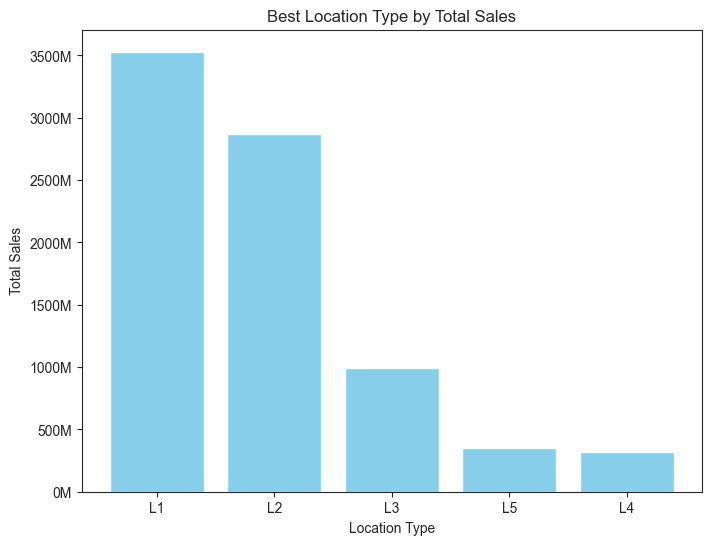

In [67]:
def format_millions(x, pos):
    return f'{x*1e-6:.0f}M'
# Agregasi
sales_by_location = df.groupby('Location_Type')['Sales'].sum().sort_values(ascending=False)

# Plotting
plt.figure(figsize=(8, 6)) # Ukuran gambar bisa disesuaikan
plt.bar(sales_by_location.index, sales_by_location.values, color='skyblue')
plt.title('Best Location Type by Total Sales')
plt.ylabel('Total Sales')
plt.xlabel('Location Type')
ax = plt.gca()

# Terapkan formatter ke sumbu y dari objek axes
ax.yaxis.set_major_formatter(FuncFormatter(format_millions))

plt.show()

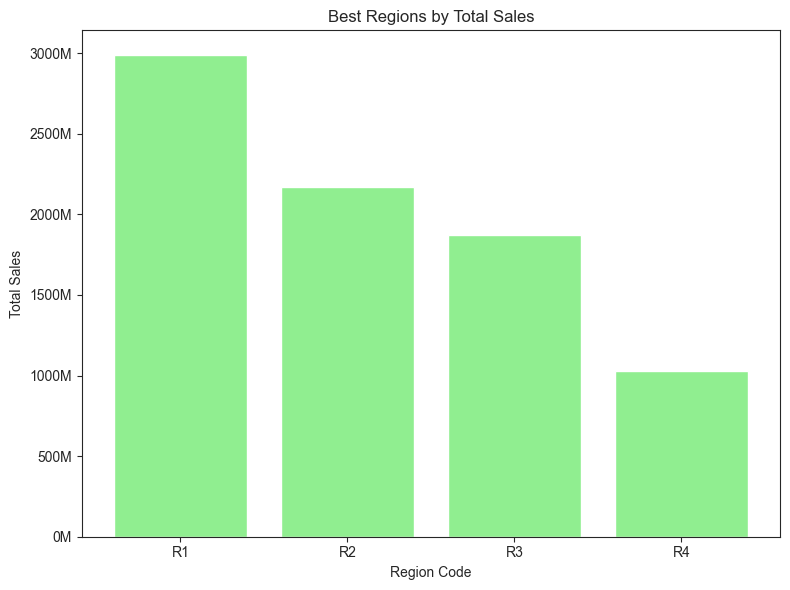

In [74]:
# Agregasi
sales_by_region = df.groupby('Region_Code')['Sales'].sum().sort_values(ascending=False)

# Plotting
plt.figure(figsize=(8, 6)) # Ukuran gambar bisa disesuaikan
plt.bar(sales_by_region.index, sales_by_region.values, color='lightgreen')
plt.title('Best Regions by Total Sales')
plt.ylabel('Total Sales')
plt.xlabel('Region Code')
ax = plt.gca()

# Terapkan formatter ke sumbu y dari objek axes
ax.yaxis.set_major_formatter(FuncFormatter(format_millions))

plt.tight_layout() # Menyesuaikan plot agar pas
plt.show()



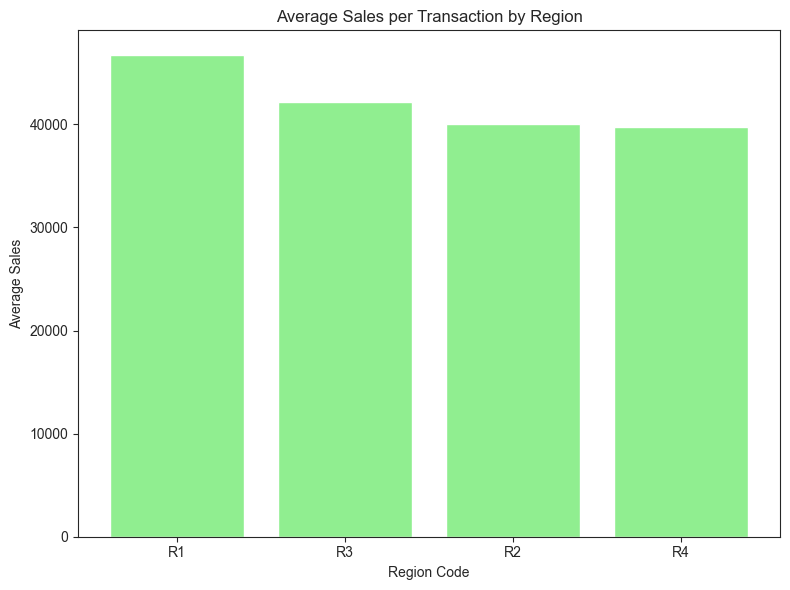

In [73]:
# Agregasi
region_sales_avg = df.groupby('Region_Code')['Sales'].mean().sort_values(ascending=False)

# Plotting
plt.figure(figsize=(8, 6)) # Ukuran gambar bisa disesuaikan
plt.bar(region_sales_avg.index, region_sales_avg.values, color='lightgreen')
plt.title('Average Sales per Transaction by Region')
plt.ylabel('Average Sales')
plt.xlabel('Region Code')

plt.tight_layout() # Menyesuaikan plot agar pas
plt.show()

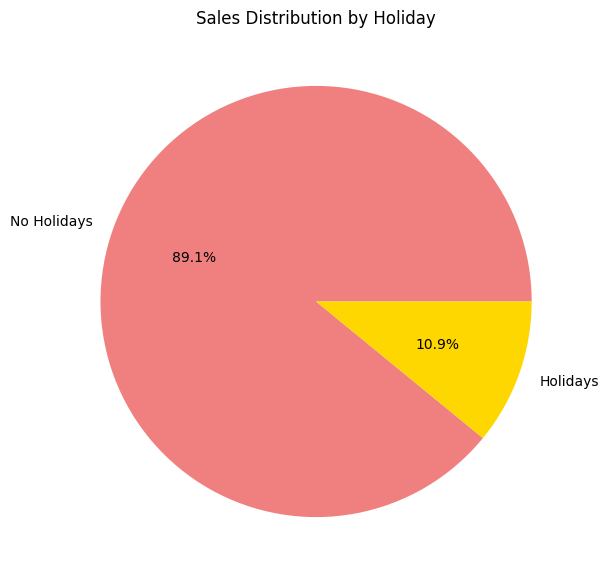

In [31]:
# Agregasi
sales_by_holiday = df.groupby('Holiday')['Sales'].sum()

# Plotting
plt.figure(figsize=(7, 7)) # Ukuran gambar bisa disesuaikan
plt.pie(sales_by_holiday, labels=['No Holidays', 'Holidays'], autopct='%1.1f%%', colors=['lightcoral', 'gold'])
plt.title('Sales Distribution by Holiday')
plt.show()

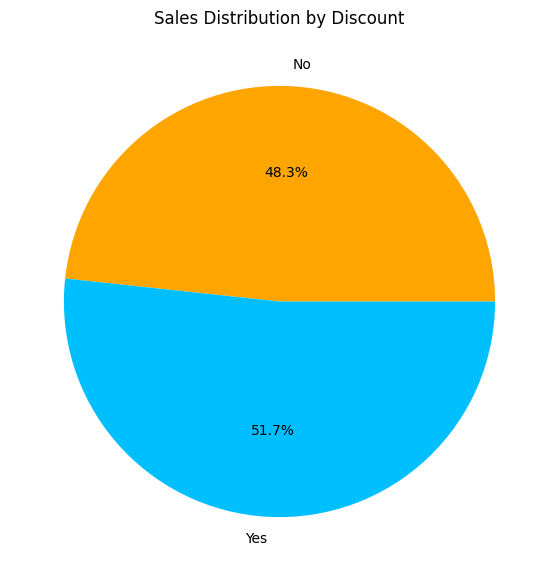

In [32]:
# Agregasi
sales_by_discount = df.groupby('Discount')['Sales'].sum()

# Plotting
plt.figure(figsize=(7, 7))
plt.pie(sales_by_discount, labels=sales_by_discount.index, autopct='%1.1f%%', colors=['orange', 'deepskyblue'])
plt.title('Sales Distribution by Discount')
plt.show()

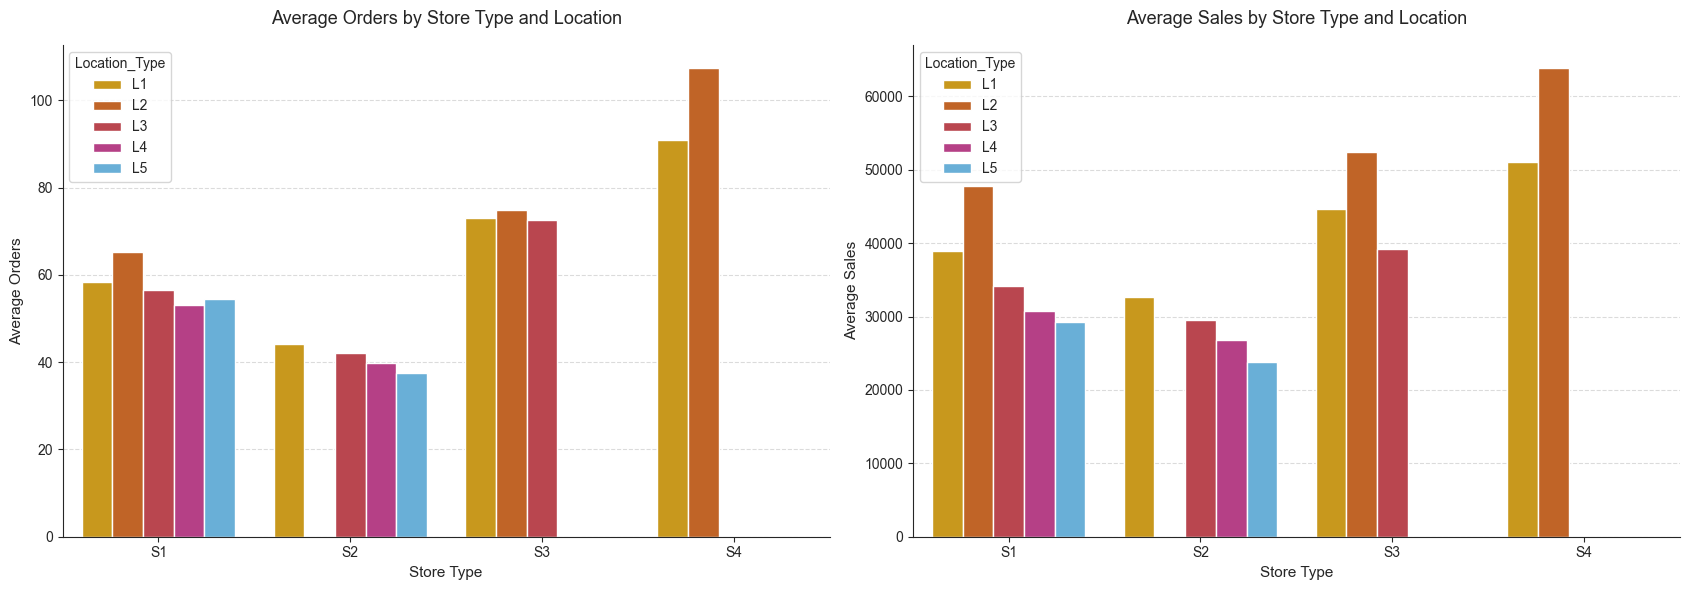

In [61]:
import seaborn as sns

# Pengaturan Dasar Plot
sns.set_style("ticks")
plt.rcParams['font.family'] = 'sans-serif'
custom_palette = ["#E5A500", "#D95F0E", "#CC333F", "#C82D8A", "#57B4E9"]

# Membuat Plot (2 subplot berdampingan)
fig, axes = plt.subplots(1, 2, figsize=(17, 6)) # Ukuran disesuaikan agar lebih pas

# --- Plot 1: Rata-rata Pesanan ---
sns.barplot(
    x='Store_Type',
    y='#Order',
    hue='Location_Type',
    data=df,
    palette=custom_palette,
    ax=axes[0],
    ci=None # Tidak menampilkan confidence interval
)
axes[0].set_title('Average Orders by Store Type and Location', fontsize=13, pad=15)
axes[0].set_xlabel('Store Type', fontsize=11)
axes[0].set_ylabel('Average Orders', fontsize=11)
axes[0].legend(title='Location_Type', loc='upper left')
axes[0].yaxis.grid(True, linestyle='--', alpha=0.7)
sns.despine(ax=axes[0])

# --- Plot 2: Rata-rata Penjualan ---
sns.barplot(
    x='Store_Type',
    y='Sales',
    hue='Location_Type',
    data=df,
    palette=custom_palette,
    ax=axes[1],
    ci=None # Tidak menampilkan confidence interval
)
axes[1].set_title('Average Sales by Store Type and Location', fontsize=13, pad=15)
axes[1].set_xlabel('Store Type', fontsize=11)
axes[1].set_ylabel('Average Sales', fontsize=11)
axes[1].legend(title='Location_Type', loc='upper left')
axes[1].yaxis.grid(True, linestyle='--', alpha=0.7)
sns.despine(ax=axes[1])

# Tampilkan Plot
plt.tight_layout() # Sedikit penyesuaian untuk layout
plt.show()

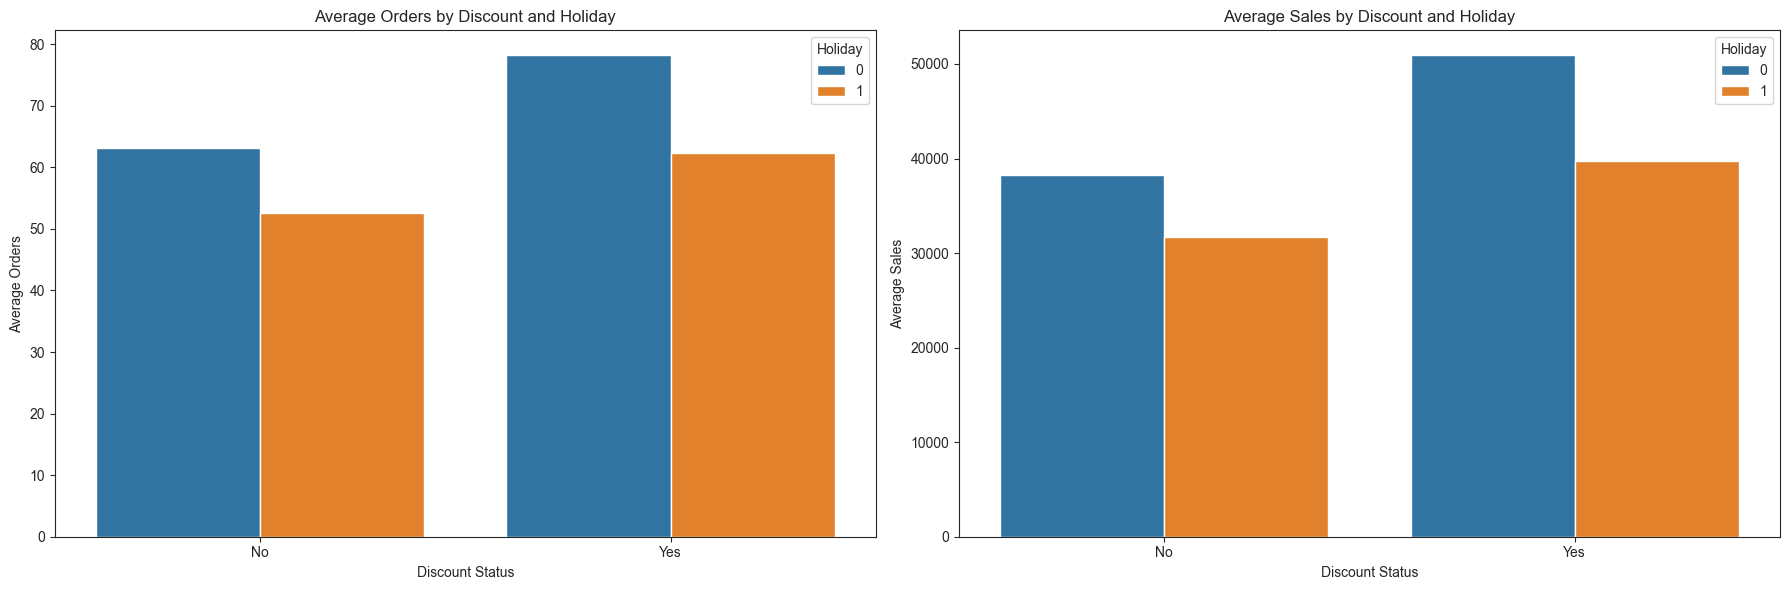

In [63]:
# Average Sales and Orders by Discount and Holiday status
discount_holiday_summary = df.groupby(['Discount', 'Holiday'])[['#Order', 'Sales']].mean().reset_index()

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Plot 1: Average Orders by Discount & Holiday
sns.barplot(data=discount_holiday_summary, x='Discount', y='#Order', hue='Holiday', ax=axes[0])
axes[0].set_title('Average Orders by Discount and Holiday')
axes[0].set_ylabel('Average Orders')
axes[0].set_xlabel('Discount Status')
axes[0].legend(title='Holiday')

# Plot 2: Average Sales by Discount & Holiday
sns.barplot(data=discount_holiday_summary, x='Discount', y='Sales', hue='Holiday', ax=axes[1])
axes[1].set_title('Average Sales by Discount and Holiday')
axes[1].set_ylabel('Average Sales')
axes[1].set_xlabel('Discount Status')
axes[1].legend(title='Holiday')

plt.tight_layout()
plt.show()